In [7]:
import pandas as pd
file_path = "/Users/igmark/Desktop/WGU Data Files/churn_clean_data.csv"
df = pd.read_csv(file_path)

In [3]:
df = pd.read_csv(file_path)
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 66 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  10000 non-null  int64  
 1   Unnamed: 0                    10000 non-null  int64  
 2   CaseOrder                     10000 non-null  int64  
 3   Customer_id                   10000 non-null  object 
 4   Interaction                   10000 non-null  object 
 5   City                          10000 non-null  object 
 6   State                         10000 non-null  object 
 7   County                        10000 non-null  object 
 8   Zip                           10000 non-null  int64  
 9   Lat                           10000 non-null  float64
 10  Lng                           10000 non-null  float64
 11  Population                    10000 non-null  int64  
 12  Area                          10000 non-null  object 
 13  Ti

# Kolmogorov-Smirnov test

In [9]:
from scipy.stats import kstest, norm
import numpy as np
np.random.seed(123)
sample = np.random.normal(loc=0, scale=1, size=100)
ks_stat, p_value = kstest(sample, norm.cdf)
print("Kolmogorov-Smirnov test:")
print("KS statistic:", ks_stat)
print("p-value:", p_value)


Kolmogorov-Smirnov test:
KS statistic: 0.10665330380822602
p-value: 0.19116286378085373


# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Outage_sec_perweek', 'Yearly_equip_failure']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Model score:", score)
new_data = from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Model score:", score)
new_data = 
    'Outage_sec_perweek': [10.5, 20.1, 5.3],
            'Yearly_equip_failure': [0, 2, 1]}
X_new_data = pd.DataFrame(new_data)
y_pred = model.predict(X_new_data)
print("Predictions:", y_pred)

X_new_data = pd.DataFrame(new_data)
y_pred = model.predict(X_new_data)
print("Predictions:", y_pred)

Model score: -0.0009702406145013498
Predictions: [0.26709113 0.22993201 0.26167431]


# ANOVA from linear regression

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = LinearRegression()
model.fit(X, y)
formula = 'Churn ~ Outage_sec_perweek + Yearly_equip_failure'
anova_model = ols(formula, data=df).fit()
print(anova_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6117
Date:                Wed, 15 Feb 2023   Prob (F-statistic):              0.542
Time:                        23:00:38   Log-Likelihood:                -6009.2
No. Observations:               10000   AIC:                         1.202e+04
Df Residuals:                    9997   BIC:                         1.205e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2814 

# ANOVA Test 

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Churn ~ Outage_sec_perweek + Yearly_equip_failure', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df         F    PR(>F)
Outage_sec_perweek       0.157460     1.0  0.808274  0.368653
Yearly_equip_failure     0.078115     1.0  0.400980  0.526598
Residual              1947.511655  9997.0       NaN       NaN


# Continuous Variables-Univariate 

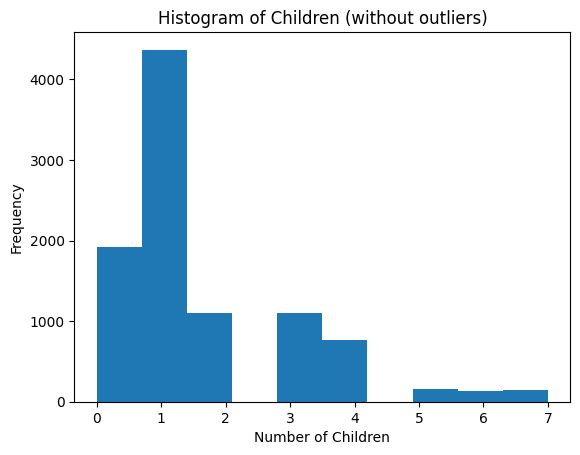

In [10]:
import matplotlib.pyplot as plt
from scipy import stats
z_scores = stats.zscore(df['Children'])
outlier_indexes = np.abs(z_scores) > 3
df_no_outliers = df[~outlier_indexes]
plt.hist(df_no_outliers['Children'], bins=10)
plt.title("Histogram of Children (without outliers)")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()

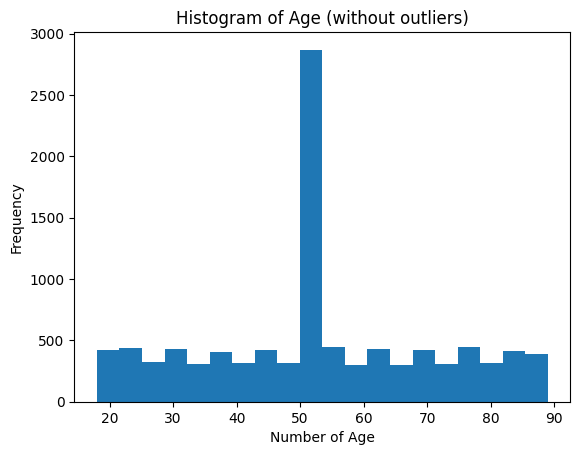

In [30]:
z_scores = stats.zscore(df['Age'])
outlier_indexes = np.abs(z_scores) > 3
df_no_outliers = df[~outlier_indexes]
plt.hist(df_no_outliers['Age'], bins=20)
plt.title("Histogram of Age (without outliers)")
plt.xlabel("Number of Age")
plt.ylabel("Frequency")
plt.show()

# Categorical Variables- Univariate 

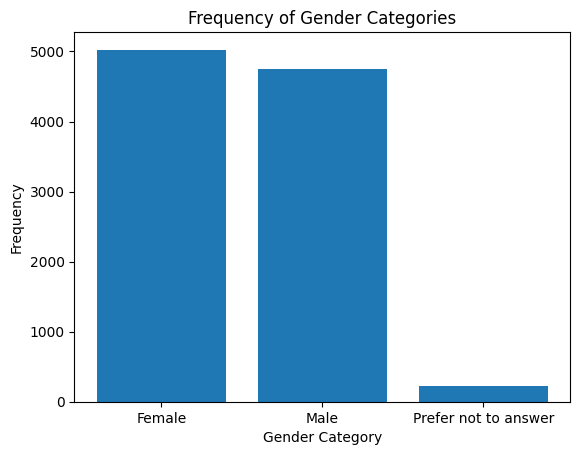

In [38]:
gender_count = df['Gender'].value_counts()
plt.bar(gender_count.index, gender_count.values)
plt.title("Frequency of Gender Categories")
plt.xlabel("Gender Category")
plt.ylabel("Frequency")
plt.show()

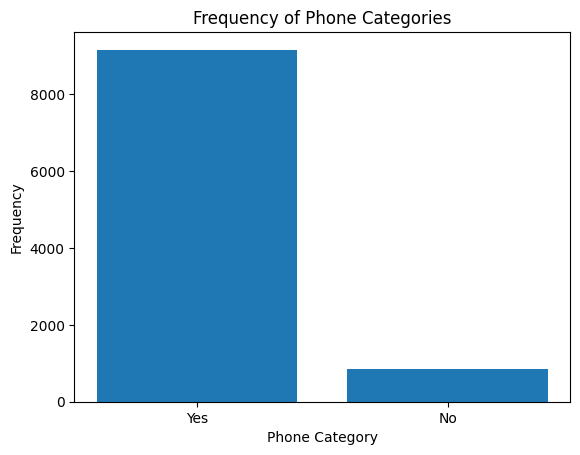

In [39]:
gender_count = df['Phone'].value_counts()
plt.bar(gender_count.index, gender_count.values)
plt.title("Frequency of Phone Categories")
plt.xlabel("Phone Category")
plt.ylabel("Frequency")
plt.show()

# Continuous Variables-Bivariate 

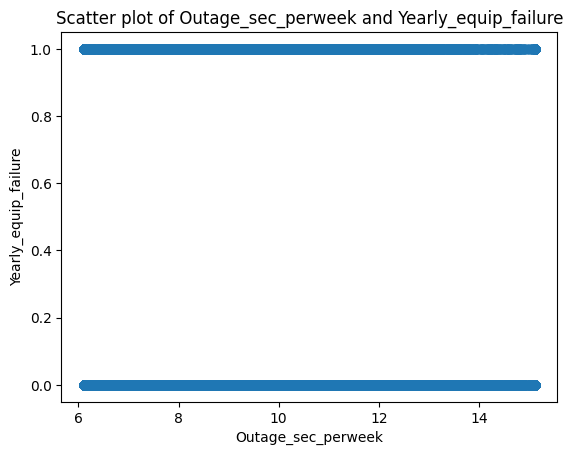

In [42]:
plt.scatter(df['Outage_sec_perweek'], df['Yearly_equip_failure'])
plt.xlabel('Outage_sec_perweek')
plt.ylabel('Yearly_equip_failure')
plt.title('Scatter plot of Outage_sec_perweek and Yearly_equip_failure')
plt.show()

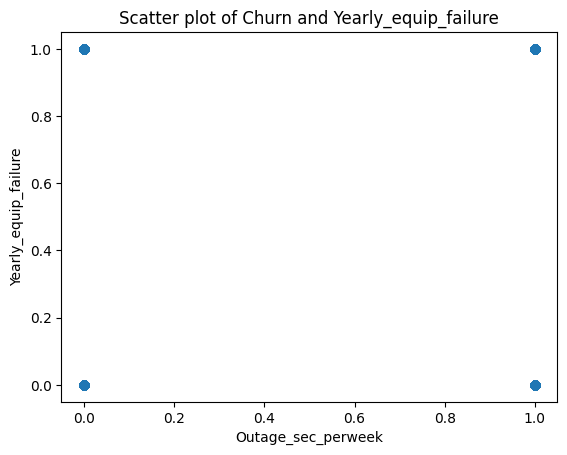

In [61]:
plt.scatter(df['Churn'], df['Yearly_equip_failure'])
plt.xlabel('Outage_sec_perweek')
plt.ylabel('Yearly_equip_failure')
plt.title('Scatter plot of Churn and Yearly_equip_failure')
plt.show()

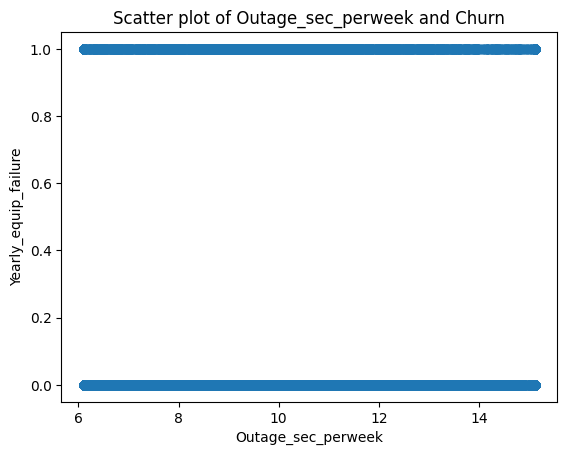

In [62]:
plt.scatter(df['Outage_sec_perweek'], df['Churn'])
plt.xlabel('Outage_sec_perweek')
plt.ylabel('Yearly_equip_failure')
plt.title('Scatter plot of Outage_sec_perweek and Churn')
plt.show()

In [ ]:
plt.scatter(df['Outage_sec_perweek'], df['Yearly_equip_failure'])
plt.xlabel('Outage_sec_perweek')
plt.ylabel('Yearly_equip_failure')
plt.title('Scatter plot of Outage_sec_perweek and Yearly_equip_failure')
plt.show()

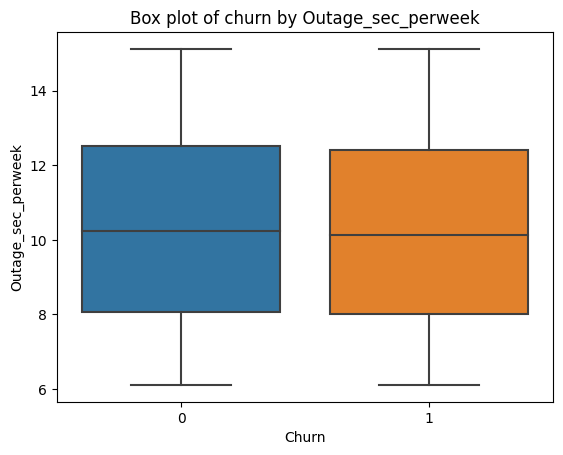

In [44]:
import seaborn as sns
sns.boxplot(x='Churn', y='Outage_sec_perweek', data=df)
plt.xlabel('Churn')
plt.ylabel('Outage_sec_perweek')
plt.title('Box plot of churn by Outage_sec_perweek')
plt.show()

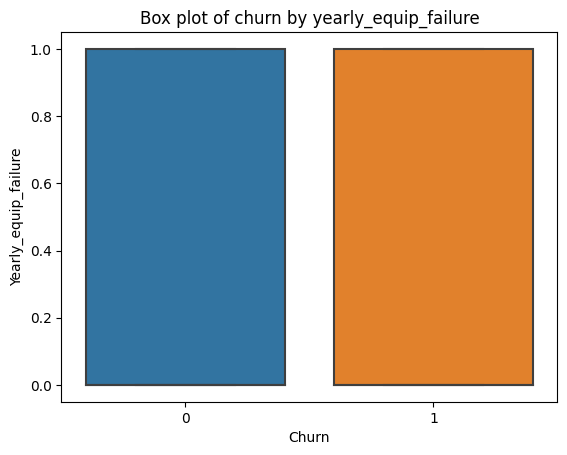

In [47]:
import seaborn as sns
sns.boxplot(x='Churn', y='Yearly_equip_failure', data=df)
plt.xlabel('Churn')
plt.ylabel('Yearly_equip_failure')
plt.title('Box plot of churn by yearly_equip_failure')
plt.show()

# Categorical Variables-Bivariate

Yearly_equip_failure   0.0   1.0
Churn                           
0                     4931  2419
1                     1796   854
Chi-square test statistic:  0.3847402042363623
p-value:  0.5350772135686583


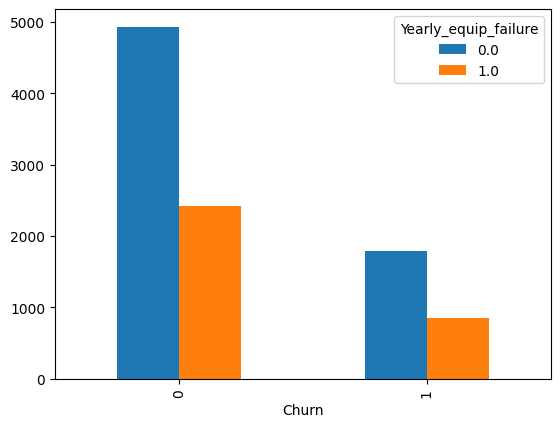

In [58]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Churn'], df['Yearly_equip_failure'])
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print('Chi-square test statistic: ', chi2)
print('p-value: ', pval)
contingency_table.plot(kind='bar')
plt.show()

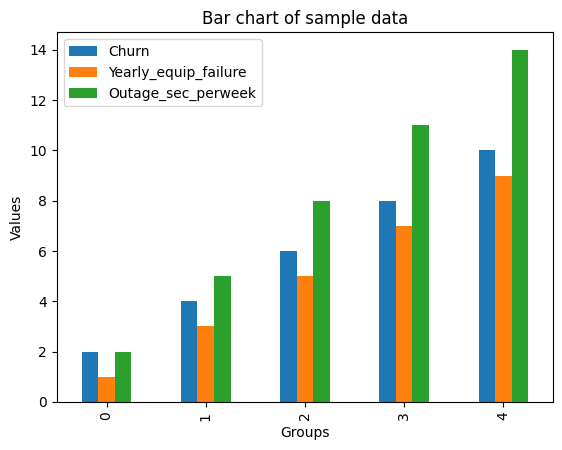

In [56]:
from scipy.stats import f_oneway
group1 = [2, 4, 6, 8, 10]
group2 = [1, 3, 5, 7, 9]
group3 = [2, 5, 8, 11, 14]
f_stat, p_val = f_oneway(group1, group2, group3)
data = pd.DataFrame({'Churn': group1, 'Yearly_equip_failure': group2, 'Outage_sec_perweek': group3})
data.plot(kind='bar')
plt.title('Bar chart of sample data')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()